# Credit Card Transactions Fraud Detection

### Task:

Build a model to detect fraudulent credit card transactions. Use a dataset containing information about credit card transactions, and experiment with algorithms like Logistic Regression, Decision Trees, or Random Forests to classify transactions as fraudulent or legitimate.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("fraudTrain.csv")
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
print(train_data.columns)

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


In [4]:
train_data.drop_duplicates(inplace=True)

In [5]:
train_data.shape

(1296675, 23)

In [6]:
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [7]:
test_data = pd.read_csv("fraudTest.csv")
test_data.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209.0,33.9659,-80.9355,333497.0,Mechanical engineer,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002.0,40.3207,-110.4360,302.0,"Sales professional, IT",324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710.0,40.6729,-73.5365,34496.0,"Librarian, public",c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780.0,28.5697,-80.8191,54767.0,Set designer,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632.0,44.2529,-85.0170,1126.0,Furniture designer,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [8]:
print(test_data.columns)

Index(['cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender',
       'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


In [9]:
test_data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,1.800430e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,3.521420e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,4.635330e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,4.992350e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [10]:
test_data.shape

(555724, 20)

In [11]:
test_data.drop_duplicates(inplace=True)

#### 
In order to predict fraud, we'll need to select the features (X) that are relevant for training our model. The important columns to use as X would be:

For the train dataset:
'category', 'amt', 'gender', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long'

For the test dataset:
'category', 'amt', 'gender', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long'

In [12]:
X_train = train_data[['category', 'amt', 'gender', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']].copy()
y_train = train_data['is_fraud']

In [13]:
X_test = test_data[['category', 'amt', 'gender', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']].copy()
y_test = test_data['is_fraud']

In [14]:
X_train.head()

,category,amt,gender,zip,lat,long,city_pop,merch_lat,merch_long
0,misc_net,4.97,F,28654,36.0788,-81.1781,3495,36.011293,-82.048315
1,grocery_pos,107.23,F,99160,48.8878,-118.2105,149,49.159047,-118.186462
2,entertainment,220.11,M,83252,42.1808,-112.2620,4154,43.150704,-112.154481
3,gas_transport,45.00,M,59632,46.2306,-112.1138,1939,47.034331,-112.561071
4,misc_pos,41.96,M,24433,38.4207,-79.4629,99,38.674999,-78.632459


In [15]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

### Handling Missing Values (NA)

In [16]:
# Drop rows with missing values in both train and test datasets
X_train.dropna(axis=0, inplace=True)
y_train = y_train[X_train.index]  # Update y_train to match the remaining rows

In [17]:
X_test.dropna(axis=0, inplace=True)
y_test = y_test[X_test.index]  # Update y_test to match the remaining rows

### Label Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in ['category', 'gender']:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

### One-Hot Encoding

In [19]:
X_train = pd.get_dummies(X_train, columns=['category', 'gender'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['category', 'gender'], drop_first=True)

In [21]:
X_train.head(3)

,amt,zip,lat,long,city_pop,merch_lat,merch_long,category_1,category_2,category_3,...,category_5,category_6,category_7,category_8,category_9,category_10,category_11,category_12,category_13,gender_1
0,4.97,28654,36.0788,-81.1781,3495,36.011293,-82.048315,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,107.23,99160,48.8878,-118.2105,149,49.159047,-118.186462,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,220.11,83252,42.1808,-112.2620,4154,43.150704,-112.154481,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
print(X_train.columns)

Index(['amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long',
       'category_1', 'category_2', 'category_3', 'category_4', 'category_5',
       'category_6', 'category_7', 'category_8', 'category_9', 'category_10',
       'category_11', 'category_12', 'category_13', 'gender_1'],
      dtype='object')


# Logistic Regression Algorithm

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [24]:
model.fit(X_train, y_train)

LogisticRegression()

In [25]:
y_pred = model.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")

Accuracy: 0.9954995240400274
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.4996784531065404


### Confusion Matrix

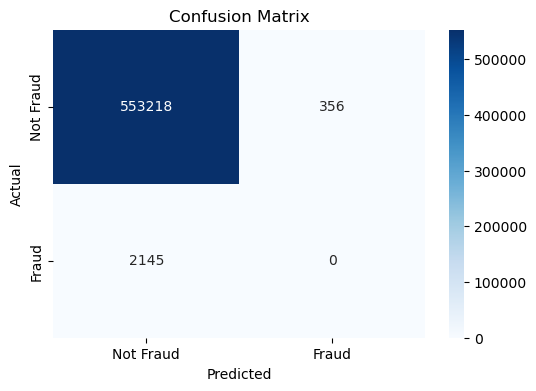

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Class Distribution

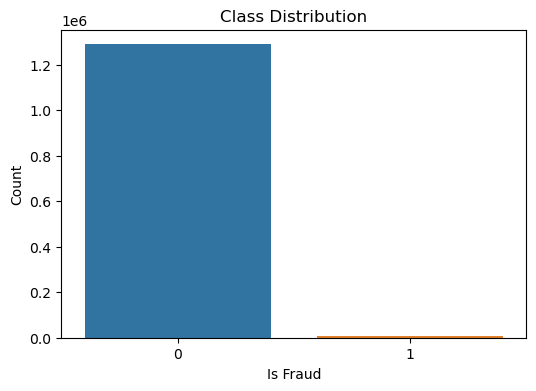

In [28]:
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=train_data)
plt.title('Class Distribution')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

### ROC Curve

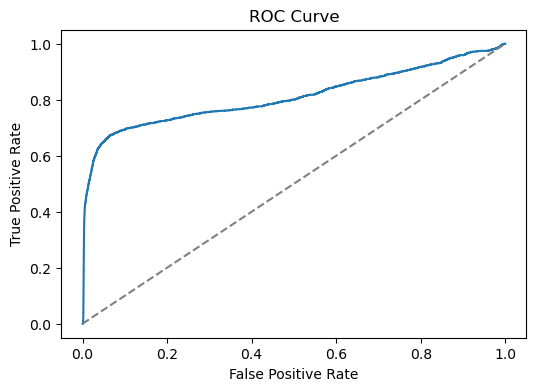

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Precision-Recall Curve

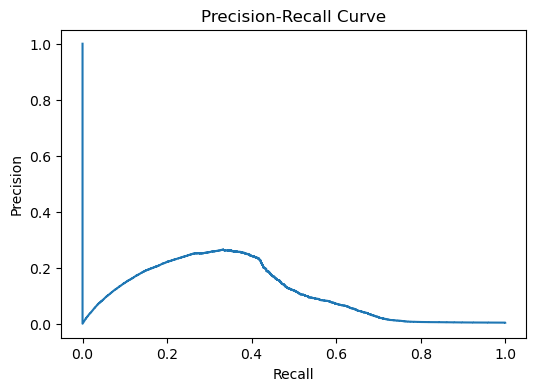

In [30]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1])

plt.figure(figsize=(6, 4))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

### Distribution of fraud cases based on Gender

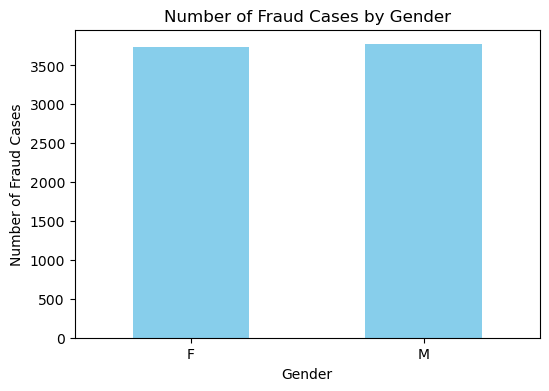

In [31]:
# Group the data by gender and calculate the number of fraud cases for each group
gender_fraud_counts = train_data[train_data['is_fraud'] == 1].groupby('gender').size()

# Plot the data
plt.figure(figsize=(6, 4))
gender_fraud_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Fraud Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Fraud Cases')
plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility
plt.show()